In [1]:
import re
import os
import nltk
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import reuters
from transformers import pipeline

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
sample_16_df = pd.read_pickle("C:/Users/rparg/Documents/Data/Reuters/sample_top16.pkl")
content_clfd_df = pd.read_pickle(
    "C:/Users/rparg/Documents/Data/Reuters/content_clfd.pkl"
)
title_clfd_df = pd.read_pickle("C:/Users/rparg/Documents/Data/Reuters/title_clfd.pkl")

<IPython.core.display.Javascript object>

In [3]:
content_clfd_df["labels"] = content_clfd_df["labels"].apply(lambda x: x[0])
content_clfd_df["scores"] = content_clfd_df["scores"].apply(lambda x: x[0])
content_clfd_df = content_clfd_df.rename(
    {
        "sequence": "content",
        "labels": "content_predicted",
        "scores": "content_score",
    },
    axis=1,
)
clfd_df = content_clfd_df.merge(sample_16_df, how="inner", on="content")

<IPython.core.display.Javascript object>

In [4]:
title_clfd_df["labels"] = title_clfd_df["labels"].apply(lambda x: x[0])
title_clfd_df["scores"] = title_clfd_df["scores"].apply(lambda x: x[0])
title_clfd_df = title_clfd_df.rename(
    {
        "sequence": "title",
        "labels": "title_predicted",
        "scores": "title_score",
    },
    axis=1,
)
clfd_df = clfd_df.merge(title_clfd_df, how="inner", on="title")

<IPython.core.display.Javascript object>

In [14]:
title_clfd_df["title_predicted"].unique()

array(['copper', 'aluminum', 'silver', 'interest', 'income',
       'strategic metal', 'barley', 'trade', 'livestock', 'rice',
       'meal feed', 'potato', 'cocoa', 'coffee', 'gas', 'corn', 'retail',
       'soybean', 'hog', 'cotton', 'platinum', 'wheat', 'fuel', 'gold',
       'money foreign exchange', 'grain', 'crude', 'housing', 'cattle',
       'heat', 'natural gas', 'palm oil', 'rubber', 'jobs', 'sugar'],
      dtype=object)

<IPython.core.display.Javascript object>

In [6]:
target_cat = [
    "aluminum",
    "barley",
    "cocoa",
    "coffee",
    "copper",
    "corn",
    "cotton",
    "crude",
    "gold",
    "grain",
    "iron steel",
    "livestock",
    "natural gas",
    "palm oil",
    "rubber",
    "sugar",
]

<IPython.core.display.Javascript object>

In [7]:
print(
    sklearn.metrics.classification_report(
        y_true=clfd_df["actual"], y_pred=clfd_df["title_predicted"], zero_division=1
    )
)

                        precision    recall  f1-score   support

              aluminum       1.00      0.62      0.77        16
                barley       0.80      0.36      0.50        11
                cattle       0.00      1.00      0.00         0
                 cocoa       1.00      0.75      0.86        16
                coffee       0.92      0.71      0.80        17
                copper       0.89      0.62      0.73        13
                  corn       1.00      0.42      0.59        19
                cotton       1.00      0.50      0.67        18
                 crude       0.00      0.00      0.00        20
                  fuel       0.00      1.00      0.00         0
                   gas       0.00      1.00      0.00         0
                  gold       1.00      0.67      0.80        18
                 grain       1.00      0.26      0.42        19
                  heat       0.00      1.00      0.00         0
                   hog       0.00      

<IPython.core.display.Javascript object>

In [8]:
cm = sklearn.metrics.confusion_matrix(clfd_df["actual"], clfd_df["title_predicted"])
cmn = (cm.astype("float") / cm.sum(axis=1)[:, np.newaxis])

<IPython.core.display.Javascript object>

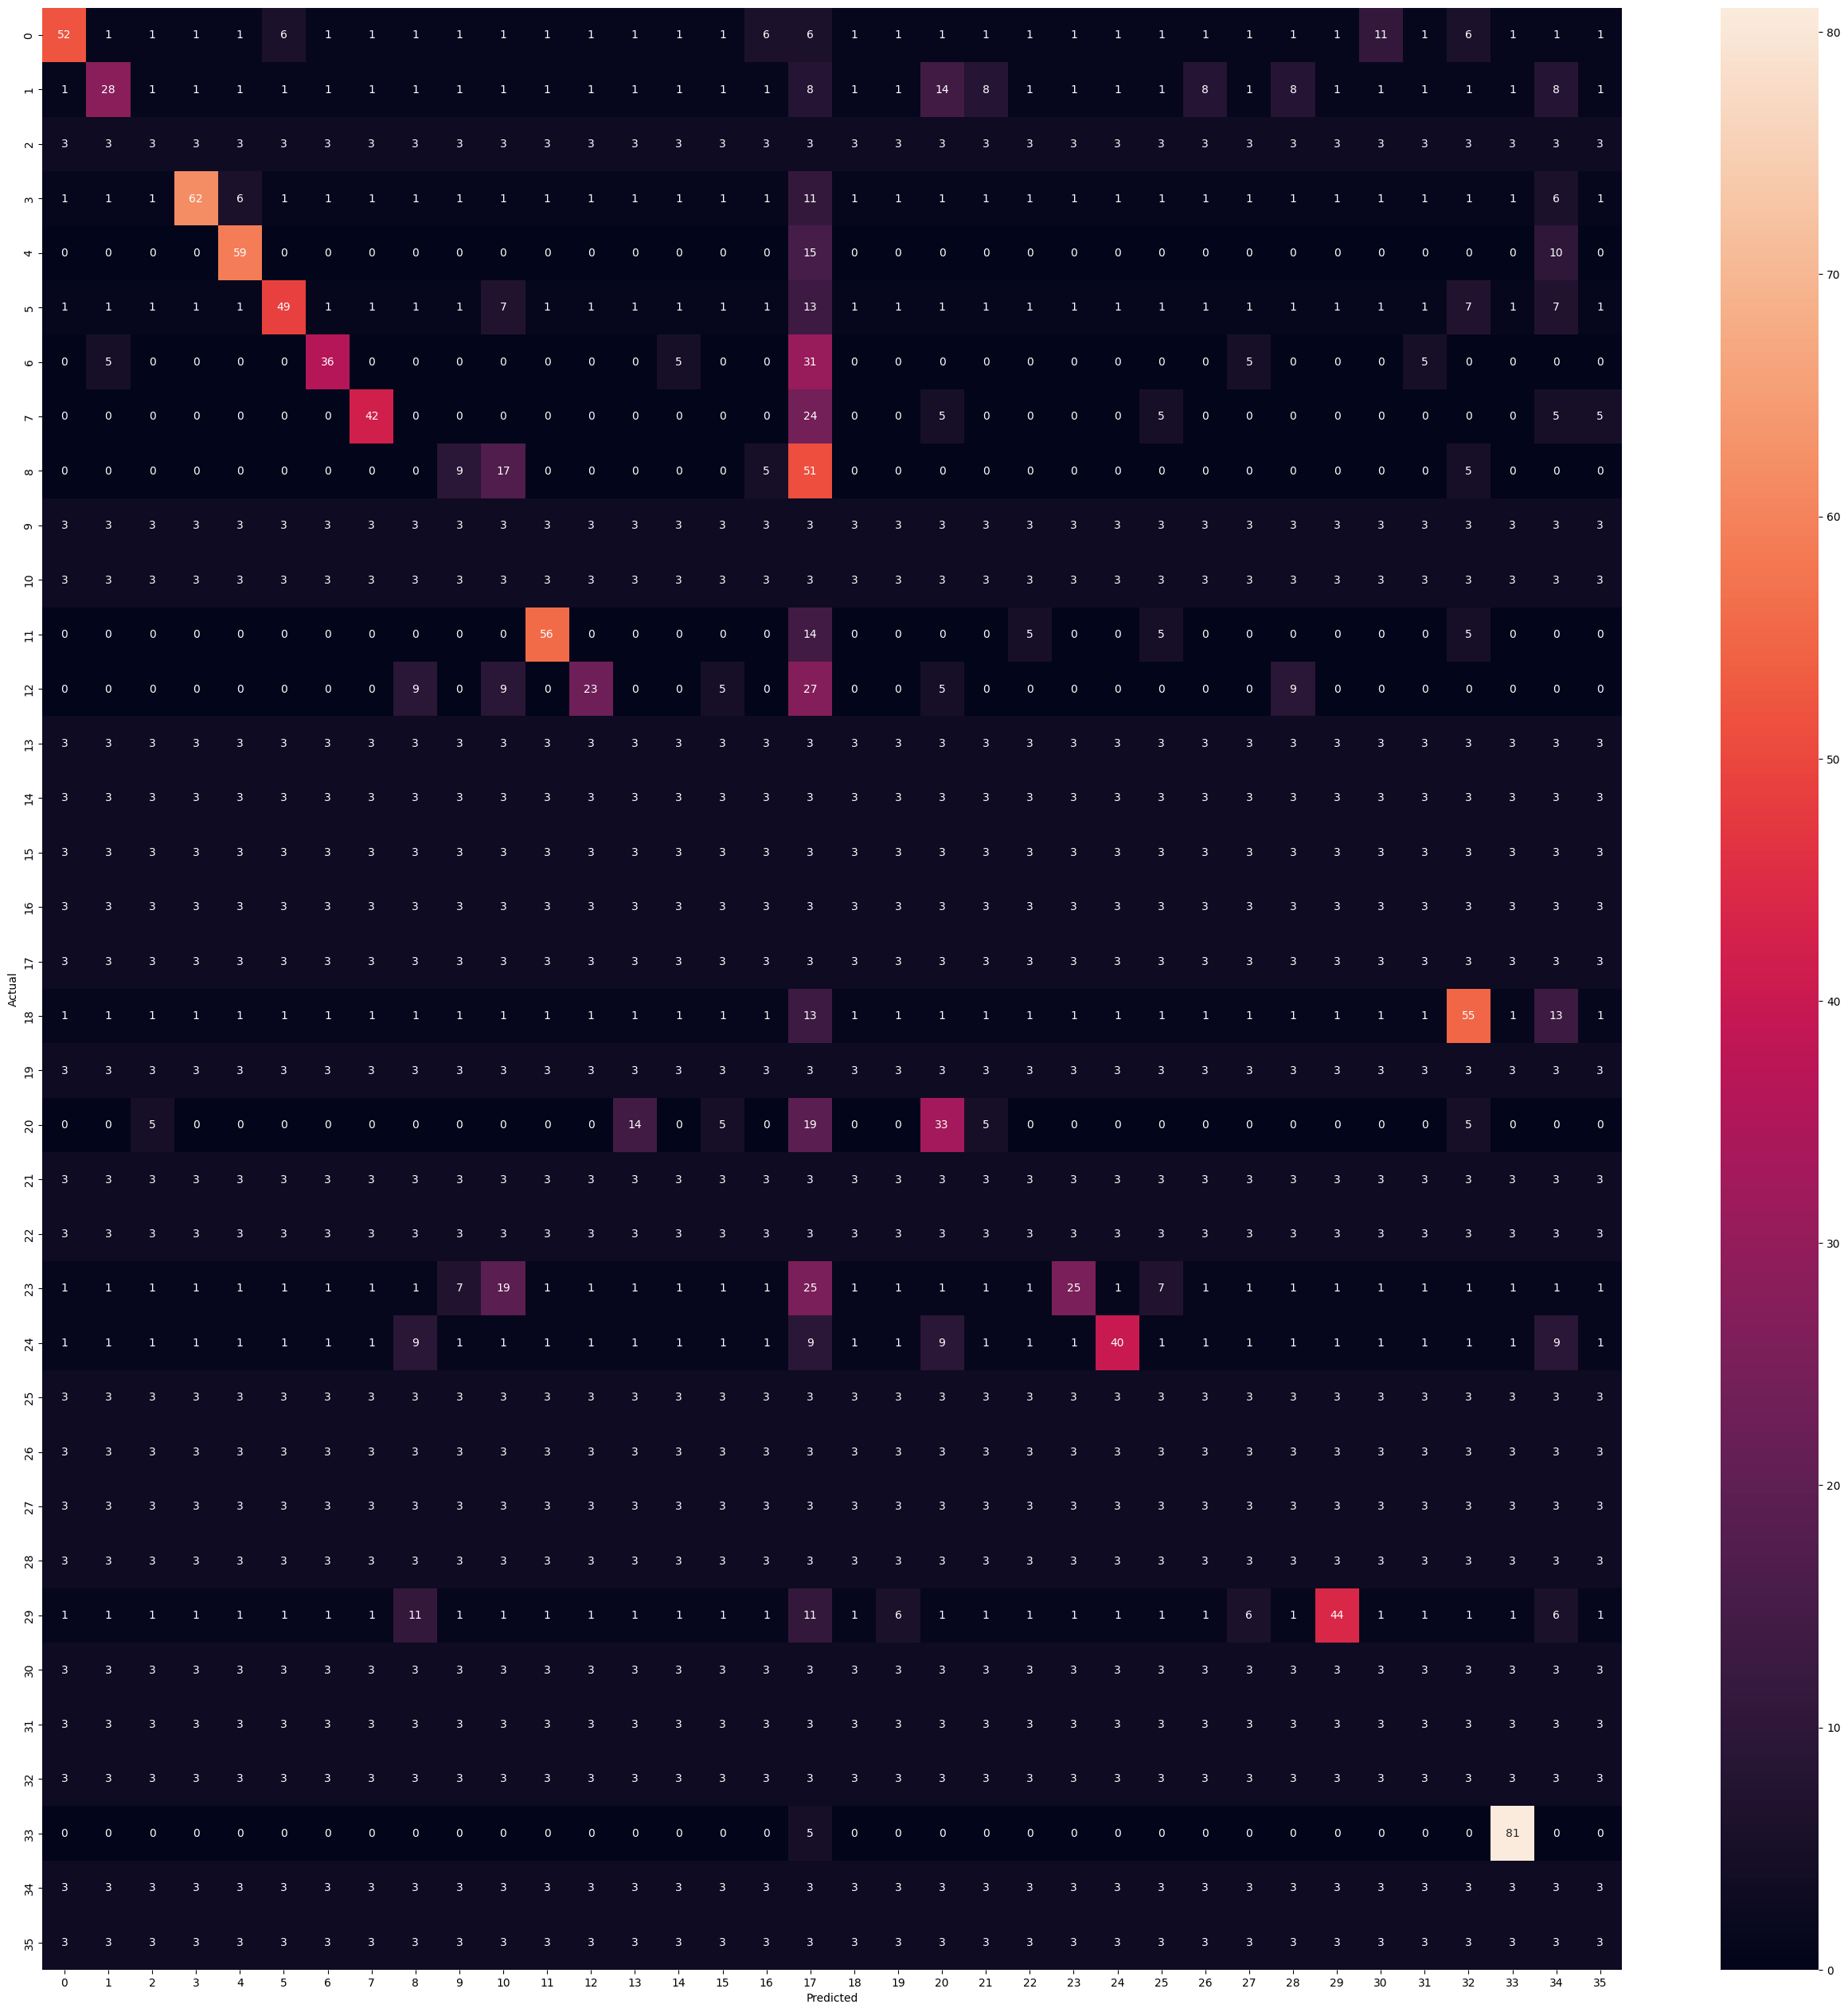

<IPython.core.display.Javascript object>

In [9]:
f, ax = plt.subplots(figsize=(32, 32))
sns.heatmap(
    cmn,
    ax=ax,
    annot=True,
    fmt=".0f",
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show(block=False)
plt.show()